##### dataset reference: [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success)
# Class: `Data_Viz`
---
# Functions: `data_clean()`, `pre_plot()`, `plot()`
>## *data_clean()*
>### Filters out unwanted columns to improve readability.
>>#### Methods: `.drop()`

>## *pre_plot()*
>### Pre-select columns that we want to plot.
>### Labels values inside columns with strings because in this dataset, they are represented by integers. *Note*: Value types are not converted, they are merely given names.
>>#### Methods: `.copy()`, `.map()`, `.groupby()`, `.count()`

>## *plot()*
>### Wrapped `matplotlib.pyplot` methods together to create a bar plot
>>#### Methods: `.bar()`, `.xlabel()`, `.ylabel()`, `.xticks()`, `.title()`, `.show()`

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class Data_Viz:
    def __init__(self):
        self.data = pd.read_csv('better_data.csv')
        
    def data_clean(self):
        self.data.drop(columns=['Application mode', 'Application order', 'Previous qualification',
                          'Curricular units 1st sem (credited)',
        'Curricular units 1st sem (enrolled)',
        'Curricular units 1st sem (evaluations)',
        'Curricular units 1st sem (approved)',
        'Curricular units 1st sem (grade)',
        'Curricular units 1st sem (without evaluations)',
        'Curricular units 2nd sem (credited)',
        'Curricular units 2nd sem (enrolled)',
        'Curricular units 2nd sem (evaluations)',
        'Curricular units 2nd sem (approved)',
        'Curricular units 2nd sem (grade)',
        'Curricular units 2nd sem (without evaluations)'])
    
    def pre_plot(self):
        subset_data = self.data[['Marital status', '"Daytime/evening attendance\t"']].copy()
        subset_data.columns = ['Marital status', 'Schedule']
        
        # We map out the values with labels inside a dictionary, then assign accordingly.
        mar_map = {
            1: "Single",
            2: "Married",
            3: "Widower",
            4: "Divorced",
            5: "Facto Union",
            6: "Legally Seperated"
        }
        day_map = {
            1: "Day",
            0: "Evening"
        }
        subset_data['Marital status'] = subset_data['Marital status'].map(mar_map)
        subset_data['Schedule'] = subset_data['Schedule'].map(day_map)
        
        self.grouped = subset_data.groupby('Marital status')['Schedule'].count()
        
    def plot(self):
        self.grouped.plot.bar()
        plt.xlabel("Level")
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.title("Title")
        plt.show()

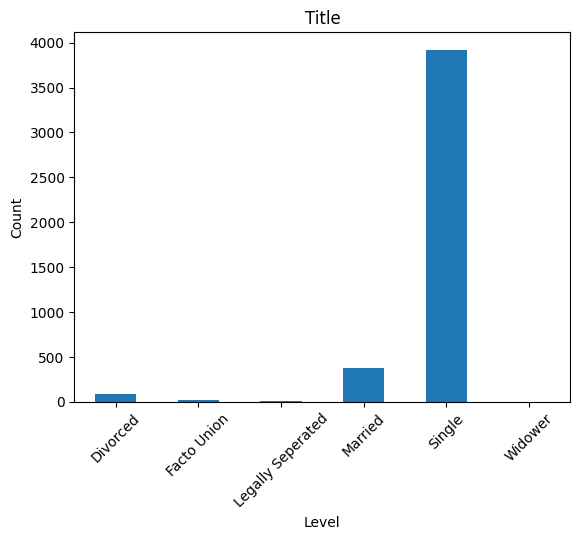

In [46]:
Data_Viz.data_clean()
Data_Viz.pre_plot()
Data_Viz.plot()